In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [16]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprec

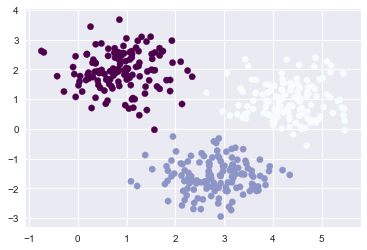

In [21]:

from sklearn.mixture import GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='BuPu');

In [19]:
probs = gmm.predict_proba(X)
print(probs.round(3))

[[0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 ...
 [0.001 0.999 0.   ]
 [0.    0.998 0.002]
 [0.287 0.713 0.   ]]


/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


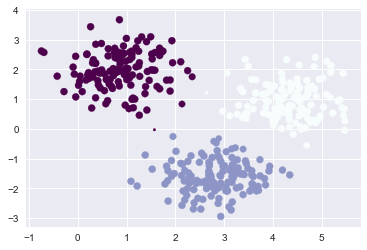

In [23]:
## size according to probability

size = 50 * probs.max(1) ** 4  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='BuPu', s=size);

/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprec

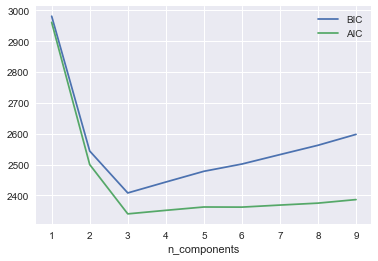

In [26]:
# calculate AICs and BICs (look for lowest frequency component, in this case 3)

n_components = np.arange(1, 10)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

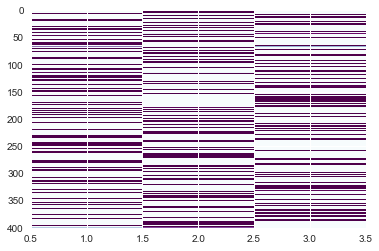

In [31]:
# plot probabilities

# rounds to 3 dp
plt.imshow(probs.round(3), aspect='auto', cmap='BuPu', extent=[0.5,3.5,400, 0])

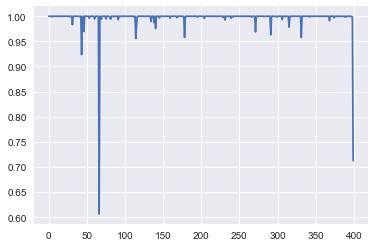

In [33]:
list = []

for row in probs: 
    list.append((row.max()))
    
plt.plot(list)

In [58]:
list_a = []

for idx, val in enumerate(probs.round(3)):
    print(idx, val)
    print(val.max())
    if val.max() != 1.0:
        list_a.append(idx)

0 [0. 0. 1.]
1.0
1 [0. 0. 1.]
1.0
2 [0. 1. 0.]
1.0
3 [0. 1. 0.]
1.0
4 [0.    0.999 0.001]
0.999
5 [1. 0. 0.]
1.0
6 [1. 0. 0.]
1.0
7 [0. 0. 1.]
1.0
8 [0. 0. 1.]
1.0
9 [1. 0. 0.]
1.0
10 [0. 1. 0.]
1.0
11 [0. 0. 1.]
1.0
12 [0. 1. 0.]
1.0
13 [0. 0. 1.]
1.0
14 [0. 1. 0.]
1.0
15 [0. 1. 0.]
1.0
16 [1. 0. 0.]
1.0
17 [1. 0. 0.]
1.0
18 [0. 1. 0.]
1.0
19 [1. 0. 0.]
1.0
20 [0. 0. 1.]
1.0
21 [0. 0. 1.]
1.0
22 [0. 1. 0.]
1.0
23 [0. 0. 1.]
1.0
24 [0. 0. 1.]
1.0
25 [1. 0. 0.]
1.0
26 [0. 0. 1.]
1.0
27 [1. 0. 0.]
1.0
28 [0. 1. 0.]
1.0
29 [0. 1. 0.]
1.0
30 [1. 0. 0.]
1.0
31 [0.    0.017 0.983]
0.983
32 [0. 1. 0.]
1.0
33 [1. 0. 0.]
1.0
34 [0. 0. 1.]
1.0
35 [1. 0. 0.]
1.0
36 [0. 1. 0.]
1.0
37 [0. 1. 0.]
1.0
38 [1. 0. 0.]
1.0
39 [0. 0. 1.]
1.0
40 [0.999 0.    0.001]
0.999
41 [1. 0. 0.]
1.0
42 [1. 0. 0.]
1.0
43 [0.    0.076 0.924]
0.924
44 [0.    0.999 0.001]
0.999
45 [0. 1. 0.]
1.0
46 [0.97 0.03 0.  ]
0.97
47 [1. 0. 0.]
1.0
48 [0. 1. 0.]
1.0
49 [0. 0. 1.]
1.0
50 [0. 0. 1.]
1.0
51 [0. 1. 0.]
1.0
52 [1. 0. 0.

In [59]:
print(list_a)

[4, 31, 40, 43, 44, 46, 53, 60, 66, 69, 75, 80, 81, 85, 91, 112, 114, 115, 117, 127, 134, 138, 140, 145, 159, 168, 177, 178, 195, 204, 221, 228, 231, 236, 239, 242, 266, 271, 282, 286, 291, 299, 306, 315, 331, 342, 368, 374, 389, 397, 398, 399]
